In [1]:
import pandas as pd
from sklearn.utils import resample

In [2]:
df = pd.read_csv("dataset/cleaned_data.csv")
df.dropna(subset=['Review'], inplace=True)
df.drop(df[df['Review'].apply(lambda x: len(str(x).split()) < 6)].index, inplace=True)

In [3]:
rating = df['Rating']

<Axes: ylabel='count'>

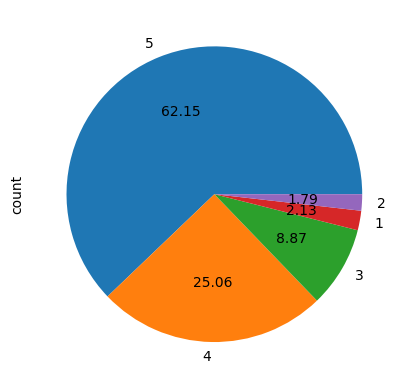

In [4]:
rating.value_counts().plot.pie(autopct="%.2f")

In [5]:
rating.value_counts()

Rating
5    4135
4    1667
3     590
1     142
2     119
Name: count, dtype: int64

In [6]:
df_1 = df[df['Rating'] == 1]
df_2 = df[df['Rating'] == 2]
df_3 = df[df['Rating'] == 3]
df_4 = df[df['Rating'] == 4]
df_5 = df[df['Rating'] == 5]

In [7]:
df_2['Rating'].value_counts()

Rating
2    119
Name: count, dtype: int64

In [8]:
reduce_size_to = 160
reduce_size_to

160

In [9]:
df_3_downsampled = resample(df_3, replace=False, n_samples=reduce_size_to, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=reduce_size_to, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=reduce_size_to, random_state=42)

In [10]:
df_balanced = pd.concat([df_1, df_2, df_3_downsampled, df_4_downsampled, df_5_downsampled])

In [11]:
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [12]:
df_balanced.head()

,Rating,Review
5840,1,"Mall terpanas, padahal mall besar tapi panas b..."
3488,2,"Tempatnya sudah tidak terawat, sayang sekali. ..."
4881,3,Tempat yg nagus tapi sayang banyak sampah bers...
4883,5,Bingung malam nongkrong dimana di Padang? Apal...
6433,3,"Lokasinya startegis.. Di pinggir laut, sayang ..."


In [13]:
df_balanced = df_balanced.reset_index(drop=True)
df_balanced.head()

,Rating,Review
0,1,"Mall terpanas, padahal mall besar tapi panas b..."
1,2,"Tempatnya sudah tidak terawat, sayang sekali. ..."
2,3,Tempat yg nagus tapi sayang banyak sampah bers...
3,5,Bingung malam nongkrong dimana di Padang? Apal...
4,3,"Lokasinya startegis.. Di pinggir laut, sayang ..."


In [14]:
df_balanced["Rating"].value_counts(), df_balanced["Rating"].value_counts().sum()

(Rating
 3    160
 5    160
 4    160
 1    142
 2    119
 Name: count, dtype: int64,
 741)

<Axes: ylabel='count'>

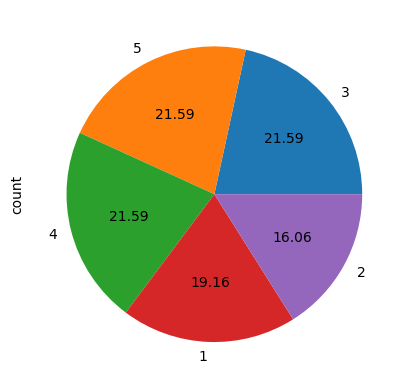

In [15]:
df_balanced["Rating"].value_counts().plot.pie(autopct="%.2f")

In [16]:
df_balanced["Rating"].value_counts().sort_index(), df_balanced["Rating"].value_counts().sum()

(Rating
 1    142
 2    119
 3    160
 4    160
 5    160
 Name: count, dtype: int64,
 741)

In [17]:
df_balanced.sample(10), df_balanced["Review"][1]

(     Rating                                             Review
 328       3  Lumayan bagus utk pantai di dalam kota. Cuma k...
 146       1  Semua tinggal monumen\nPemProv tolong perhatik...
 309       2  Di sekitar cottage lumayan asri suasananya, te...
 52        4  Pertama ke Avros menu biasa saja tdk ada yg ch...
 304       3  Ini yang ketiga kalinya kesini sejak tahun 201...
 687       1  We visited here today with our children expect...
 222       2  Bagi Pengendara Kendaraan yang Melintasi Jalur...
 691       3  Untuk sekarang, mungkin ini alternatif tempat ...
 579       5  Taman yang ada danau di tengah sebagai penarik...
 16        1  Niatnya mau nyantai nyewa glamping, eh tau nya...,
 'Tempatnya sudah tidak terawat, sayang sekali. Tapi masih bisa untuk duduk di gazebo di belakang patung biuku')

In [18]:
df_balanced['Review'] = df_balanced['Review'].astype(str)

In [19]:
import re

def clean_text(text):
    pattern = r'[^A-Za-z0-9\s]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

df_balanced["Review"] = df_balanced["Review"].apply(clean_text)

In [20]:
converted = pd.DataFrame(df_balanced)
converted.to_csv('balanced_data.csv', index=False)

In [21]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  741 non-null    int64 
 1   Review  741 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.7+ KB
